# Setup

In [ ]:
!pip install ultralytics --quiet
!pip install roboflow --quiet
!pip install torch torchvision onnx onnx2keras tensorflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 68.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
pip install torch

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
import shutil
from google.colab import files
import torch
import os
import onnx
from onnx2keras import onnx_to_keras

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


# Data

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="omDBjHRrb9UFDvmRW9cb")
project = rf.workspace("augment-gkvan").project("skin-problems-detection")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Skin-Problems-Detection-9 in yolov8:: 100%|██████████| 3238/3238 [00:02<00:00, 1597.50it/s]


# 25-416

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=416 plots=True

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Skin-Problems-Detection-9/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1717243969.f33b7a1f0966.2653.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1320.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1321.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1322.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


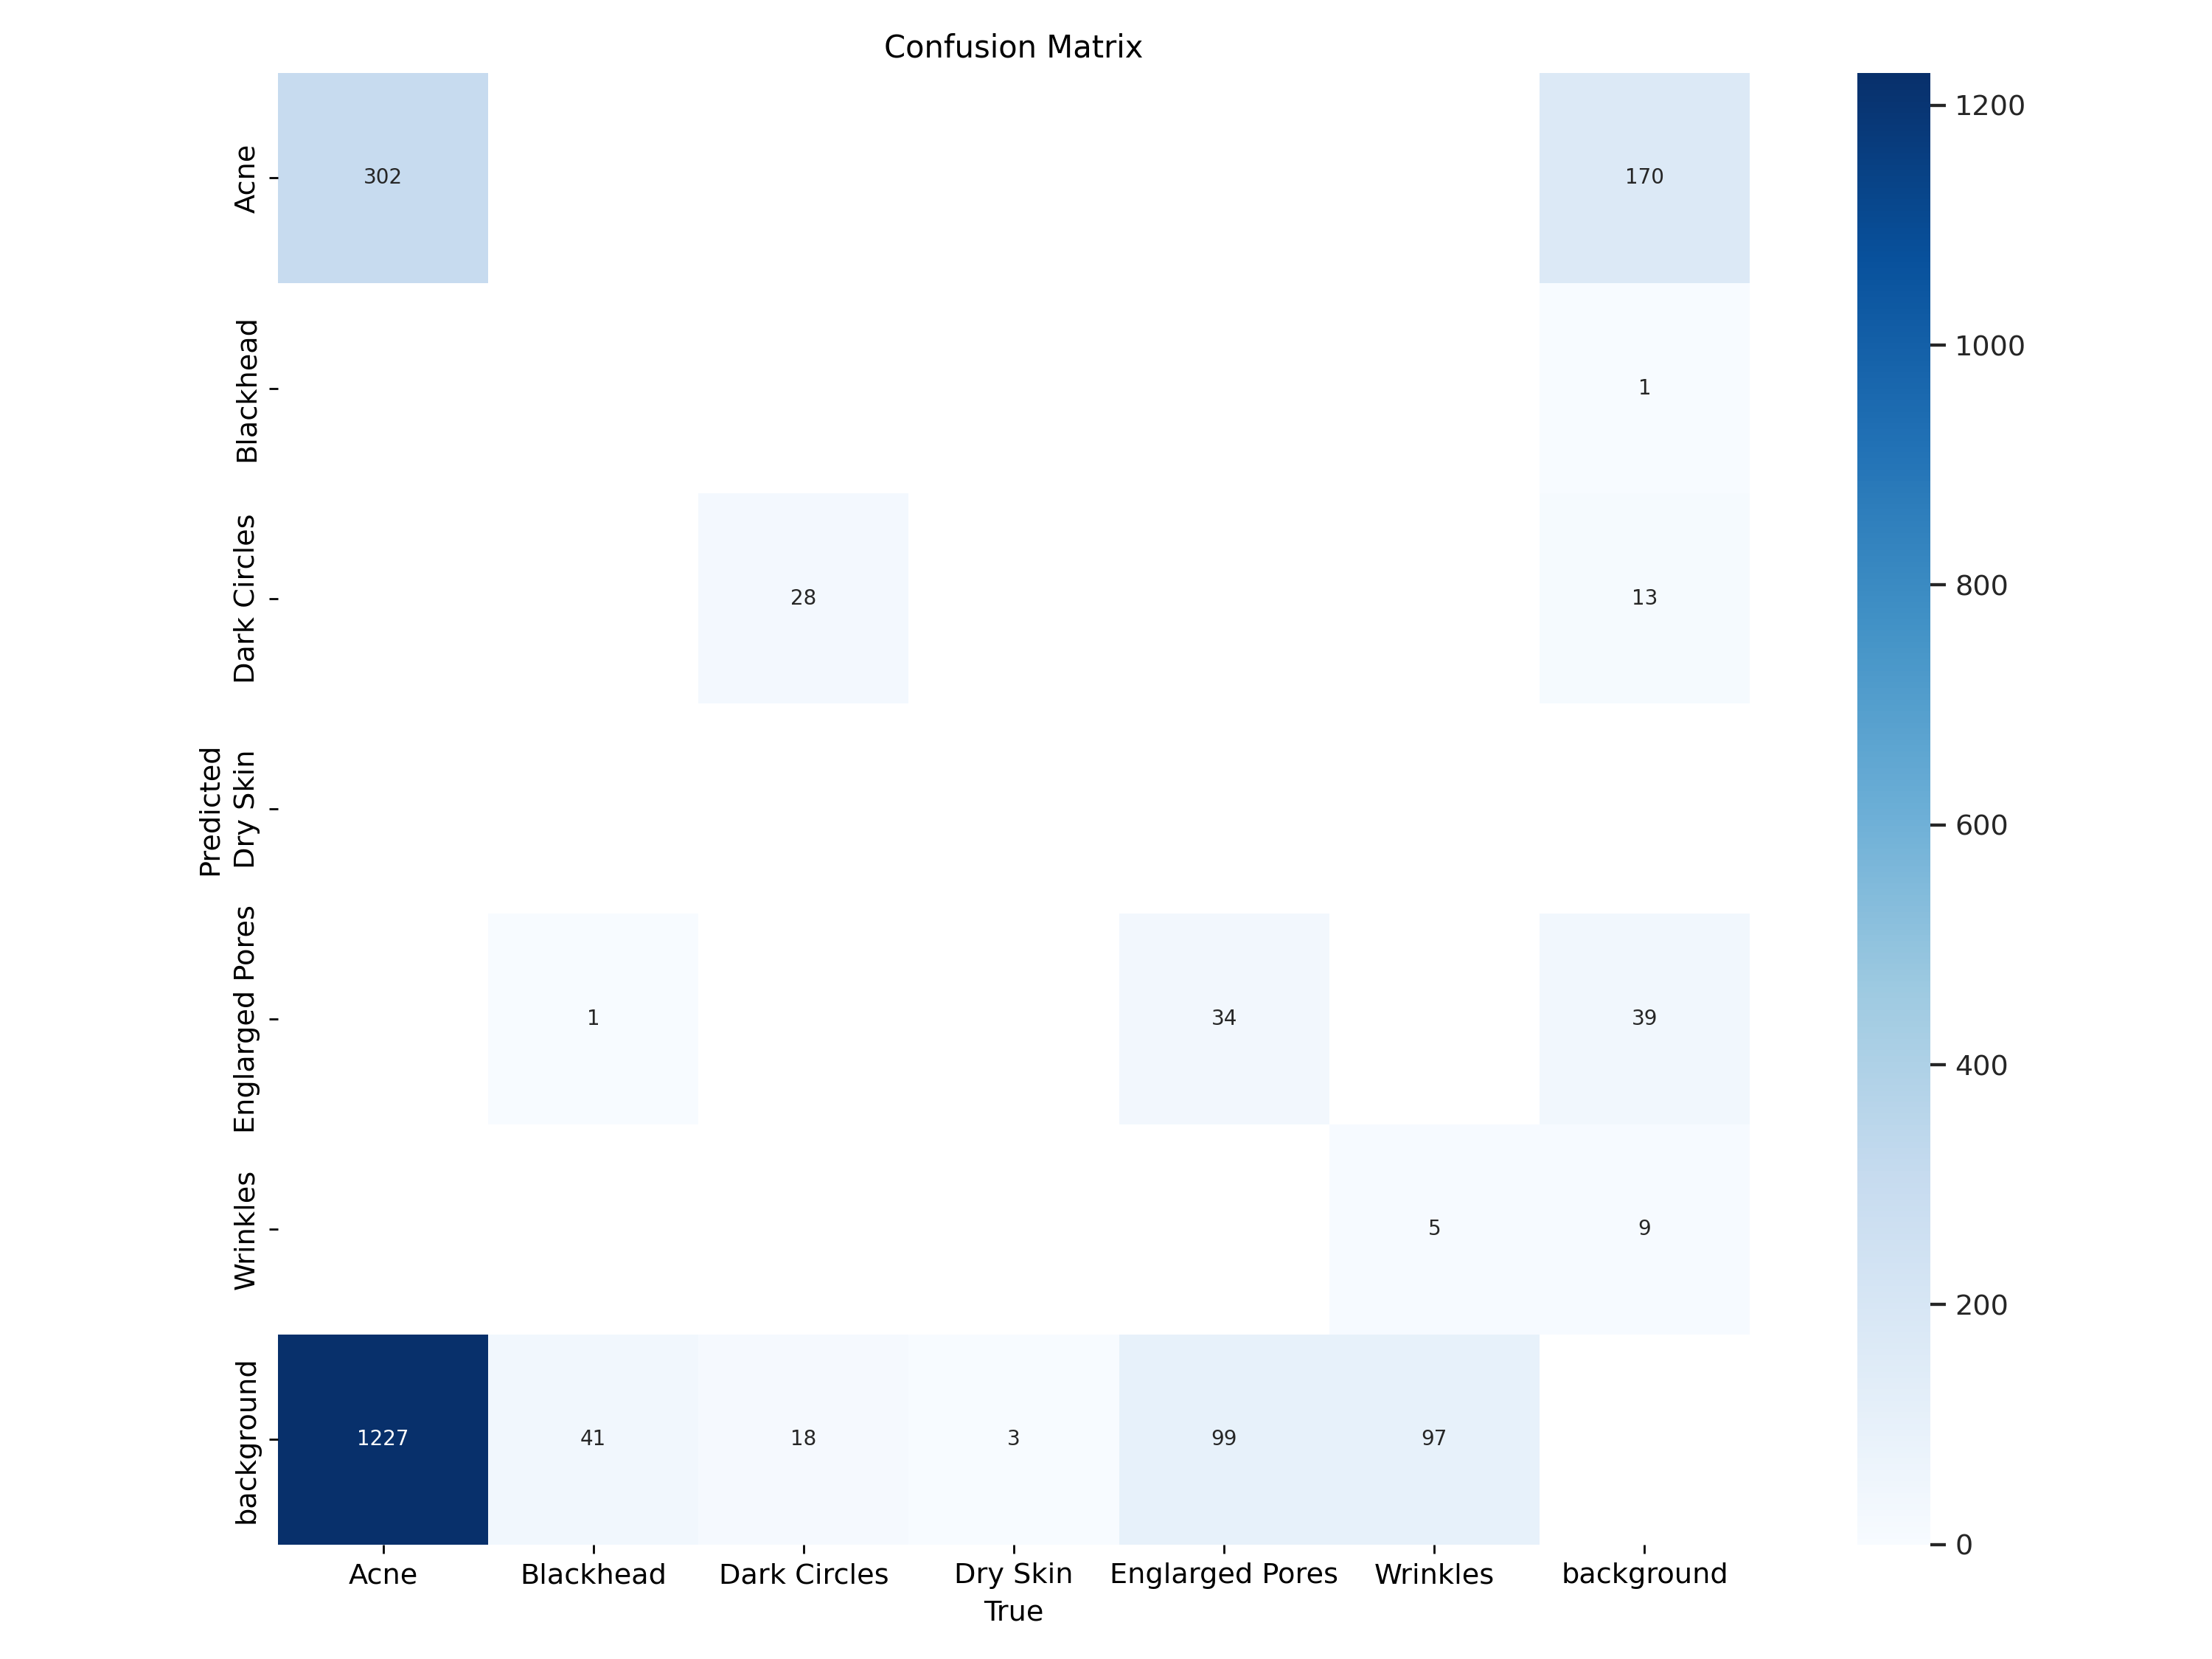

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
# data validasi
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Skin-Problems-Detection-9/valid/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100% 137/137 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:14<00:00,  1.66s/it]
                   all        137       1855      0.233      0.218      0.186     0.0743
                  Acne        128       1529      0.406      0.263      0.238     0.0647
             Blackhead         23         42          0          0    0.00642    0.00227
          Dark Circles         28         46      0.541      0.674      0.643      0.311
              Dry Skin          3          3          0          0          0          0
       Englarged Pores         64        133      0.231      0.263      0.169     0.0527
              Wri

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/69 /content/datasets/Skin-Problems-Detection-9/test/images/108_jpg.rf.326dd5c8c5488c5515da1803cd8cbeb6.jpg: 416x416 2 Acnes, 10.9ms
image 2/69 /content/datasets/Skin-Problems-Detection-9/test/images/11_jpg.rf.07d92630b0333834b76e402e9152c2dc.jpg: 416x416 4 Acnes, 10.2ms
image 3/69 /content/datasets/Skin-Problems-Detection-9/test/images/134_jpg.rf.d88e6307f513e2d0ed2fffc63d284c70.jpg: 416x416 1 Acne, 1 Englarged Pores, 10.1ms
image 4/69 /content/datasets/Skin-Problems-Detection-9/test/images/138_jpg.rf.b37b16a2ca1cb6099de240133baa8389.jpg: 416x416 3 Acnes, 1 Dark Circles, 1 Englarged Pores, 10.0ms
image 5/69 /content/datasets/Skin-Problems-Detection-9/test/images/140_jpg.rf.cb7c8b422db65b4d3d94c90a91ba4bad.jpg: 416x416 2 Acnes, 1 Dark Circles, 10.1ms
image 6/69 /content/datasets/Skin-Problems-Detection-9

## Export

In [ ]:
folder_path = '/content/runs/detect/train/'
zip_path = '/content/D2M4_25_416.zip'
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
best_model_path = 'runs/detect/train/weights/best.pt'
shutil.copy(best_model_path, 'D2M4_25_416.pt')
files.download('D2M4_25_416.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Convert

In [ ]:
import json
model_path = 'runs/detect/train/weights/best.pt'
model = YOLO(model_path)

state_dict = model.model.state_dict()
state_dict_json = {key: value.tolist() for key, value in state_dict.items()}

json_path = 'D2M4_25_416.json'
with open(json_path, 'w') as json_file:
    json.dump(state_dict_json, json_file)

print(f"Model parameters have been saved to {json_path}")
files.download('D2M4_25_416.json')

Model parameters have been saved to D2M4_25_416.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_path = 'D2M4_25_416.pt'
model = YOLO(model_path)
# model.eval()
dummy_input = torch.randn(1, 3, 416, 416)
onnx_path = "D2M4_25_416.onnx"
torch.onnx.export(model, dummy_input, onnx_path, opset_version=11)

onnx_model = onnx.load(onnx_path)

# Konversi ONNX ke Keras
k_model = onnx_to_keras(onnx_model, ['input'])

# Simpan model Keras sebagai .h5
k_model.save('/content/D2M4_25_416.h5')
files.download('D2M4_25_416.h5')
del model
del onnx_model
del k_model

Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=D2M4_25_416.pt, data=/content/datasets/Skin-Problems-Detection-9/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning /content/datasets/Skin-Problems-Detection-9/train/labels.cache... 1407 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1407/1407 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/Skin-Problems-Detection-9/valid/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.8G      2.415      1.611      1.155        313        416: 100%|██████████| 88/88 [01:37<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        137       1855      0.233      0.189       0.17     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.3G        2.5      1.732      1.184        212        416: 100%|██████████| 88/88 [01:35<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


                   all        137       1855      0.566      0.169      0.159     0.0555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.37G      2.519      1.778      1.203        305        416: 100%|██████████| 88/88 [01:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all        137       1855      0.534      0.211      0.149     0.0531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.44G      2.607      1.866      1.227        212        416: 100%|██████████| 88/88 [01:38<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


                   all        137       1855        0.2      0.176       0.13     0.0438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.31G      2.561      1.804      1.206        342        416: 100%|██████████| 88/88 [01:29<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]


                   all        137       1855      0.171      0.247      0.157     0.0586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.31G      2.564      1.801      1.218        315        416: 100%|██████████| 88/88 [01:35<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


                   all        137       1855      0.319      0.196      0.132     0.0468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.38G      2.509      1.755      1.183        297        416: 100%|██████████| 88/88 [01:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


                   all        137       1855      0.236      0.204      0.151     0.0532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.31G      2.527      1.737      1.202        231        416: 100%|██████████| 88/88 [01:32<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


                   all        137       1855      0.389      0.169      0.156      0.065

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.52G      2.497      1.734      1.208        305        416: 100%|██████████| 88/88 [01:29<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        137       1855      0.364      0.187      0.144     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.35G      2.507      1.726      1.198        300        416: 100%|██████████| 88/88 [01:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


                   all        137       1855      0.418      0.167      0.151      0.057

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.29G      2.464      1.703      1.191        347        416: 100%|██████████| 88/88 [01:30<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


                   all        137       1855      0.221      0.176      0.152      0.063

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.32G      2.468      1.691      1.178        333        416: 100%|██████████| 88/88 [01:35<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        137       1855      0.216      0.195      0.167     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G      2.452      1.672      1.177        330        416: 100%|██████████| 88/88 [01:30<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        137       1855      0.247      0.226      0.187     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.48G      2.452      1.655      1.187        265        416: 100%|██████████| 88/88 [01:31<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


                   all        137       1855      0.168      0.201      0.155     0.0611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.26G      2.425      1.641      1.177        209        416: 100%|██████████| 88/88 [01:29<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        137       1855      0.242       0.22      0.172     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.32G      2.445      1.626       1.18        427        416: 100%|██████████| 88/88 [01:36<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        137       1855      0.235      0.181      0.153     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.28G      2.454       1.62      1.189        320        416: 100%|██████████| 88/88 [01:28<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


                   all        137       1855      0.239      0.232      0.183     0.0668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.3G      2.432      1.598      1.164        287        416: 100%|██████████| 88/88 [01:31<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


                   all        137       1855      0.227      0.169      0.157     0.0615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.32G      2.376      1.549      1.149        197        416: 100%|██████████| 88/88 [01:31<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]


                   all        137       1855      0.309      0.204      0.181     0.0685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.33G      2.371      1.541      1.174        406        416: 100%|██████████| 88/88 [01:29<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        137       1855      0.199      0.238      0.181     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.43G      2.377      1.544      1.157        322        416: 100%|██████████| 88/88 [01:38<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        137       1855      0.241      0.208      0.188     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.46G      2.359      1.531      1.158        193        416: 100%|██████████| 88/88 [01:30<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


                   all        137       1855      0.247      0.239      0.191     0.0745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.33G      2.349      1.506      1.159        352        416: 100%|██████████| 88/88 [01:39<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        137       1855      0.209      0.171      0.157     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.33G      2.322      1.482      1.144        167        416: 100%|██████████| 88/88 [01:29<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


                   all        137       1855      0.271      0.241      0.204     0.0819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.38G      2.306      1.483      1.141        216        416: 100%|██████████| 88/88 [01:36<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


                   all        137       1855      0.216      0.222      0.174     0.0671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.35G      2.336      1.459      1.129        293        416: 100%|██████████| 88/88 [01:28<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        137       1855       0.45      0.191      0.177     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.34G      2.315      1.443      1.137        263        416: 100%|██████████| 88/88 [01:32<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        137       1855      0.405      0.212      0.175     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.3G      2.276       1.43      1.129        226        416: 100%|██████████| 88/88 [01:27<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


                   all        137       1855       0.22      0.208      0.168     0.0587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.34G      2.303      1.435      1.136        248        416: 100%|██████████| 88/88 [01:36<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        137       1855      0.205      0.216      0.199     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.34G      2.256      1.399      1.121        327        416: 100%|██████████| 88/88 [01:30<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


                   all        137       1855      0.281      0.191      0.169     0.0642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.34G      2.239       1.39      1.122        309        416: 100%|██████████| 88/88 [01:39<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        137       1855      0.284        0.2      0.174     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.29G      2.226      1.374      1.111        287        416: 100%|██████████| 88/88 [01:30<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        137       1855      0.201      0.188      0.157     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.29G       2.21      1.356      1.111        265        416: 100%|██████████| 88/88 [01:40<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


                   all        137       1855      0.266      0.178      0.163     0.0628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.31G      2.234      1.366      1.108        198        416: 100%|██████████| 88/88 [01:28<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        137       1855      0.274      0.194      0.178     0.0655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.32G      2.208      1.332      1.102        287        416: 100%|██████████| 88/88 [01:39<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        137       1855       0.23      0.235      0.183     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.28G      2.157      1.318      1.101        193        416: 100%|██████████| 88/88 [01:27<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        137       1855      0.257      0.212      0.182     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.3G      2.196      1.331        1.1        318        416: 100%|██████████| 88/88 [01:39<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        137       1855      0.228      0.228       0.17      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.34G      2.184      1.305      1.094        426        416: 100%|██████████| 88/88 [01:28<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        137       1855       0.29      0.191      0.185     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.3G       2.17      1.308      1.092        210        416: 100%|██████████| 88/88 [01:29<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


                   all        137       1855      0.245      0.225      0.184     0.0697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.31G      2.132      1.281      1.094        370        416: 100%|██████████| 88/88 [01:28<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]

                   all        137       1855      0.244      0.219      0.175     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.44G      2.141      1.279      1.092        352        416: 100%|██████████| 88/88 [01:28<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        137       1855      0.304      0.204      0.187     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.43G      2.116      1.255       1.08        218        416: 100%|██████████| 88/88 [01:33<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


                   all        137       1855      0.282      0.195      0.192      0.072

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.32G      2.083      1.228      1.084        391        416: 100%|██████████| 88/88 [01:30<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        137       1855      0.238      0.215       0.18     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.34G      2.104      1.256       1.07        292        416: 100%|██████████| 88/88 [01:42<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        137       1855       0.28      0.208      0.183       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.32G      2.086      1.226       1.07        343        416: 100%|██████████| 88/88 [01:30<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        137       1855      0.297      0.171      0.167     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.26G      2.074       1.22      1.068        352        416: 100%|██████████| 88/88 [01:39<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        137       1855       0.28       0.21      0.186      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.38G      2.071      1.211      1.072        284        416: 100%|██████████| 88/88 [01:28<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        137       1855      0.275      0.224      0.199     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.3G      2.042      1.194       1.06        193        416: 100%|██████████| 88/88 [01:35<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        137       1855      0.313      0.207      0.187     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.3G      2.018      1.185      1.057        368        416: 100%|██████████| 88/88 [01:28<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        137       1855      0.256      0.202      0.174     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.35G      2.038      1.179      1.063        289        416: 100%|██████████| 88/88 [01:36<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        137       1855      0.495      0.214      0.195     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.34G      2.013      1.172      1.054        279        416: 100%|██████████| 88/88 [01:30<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        137       1855      0.245      0.227      0.189     0.0717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.29G      1.993      1.158      1.047        304        416: 100%|██████████| 88/88 [01:38<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        137       1855      0.276       0.21      0.189     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.32G      1.989      1.147      1.048        244        416: 100%|██████████| 88/88 [01:31<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        137       1855      0.286      0.201      0.183     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.32G       1.98      1.135      1.048        382        416: 100%|██████████| 88/88 [01:40<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        137       1855       0.46      0.201      0.192      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.37G       1.98      1.144      1.044        191        416: 100%|██████████| 88/88 [01:30<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        137       1855      0.289      0.225      0.184     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.25G       1.98      1.127      1.041        336        416:  50%|█████     | 44/88 [00:46<00:53,  1.22s/it]